<a href="https://colab.research.google.com/github/MaxFoltz/Desafio_datos/blob/main/Telecomx_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import requests

# URL del archivo JSON crudo (RAW) desde GitHub
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# Obtener los datos desde la URL
response = requests.get(url)

# Verificamos que la solicitud fue exitosa
if response.status_code == 200:
    data = response.json()
    # Convertir a DataFrame
    df = pd.DataFrame(data)
    print("✅ Datos cargados correctamente:")
    display(df.head())
else:
    print(f"❌ Error al cargar datos. Código de estado: {response.status_code}")


✅ Datos cargados correctamente:


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [2]:
# Expandir columnas anidadas
df_customer = df['customer'].apply(pd.Series)
df_phone = df['phone'].apply(pd.Series)
df_internet = df['internet'].apply(pd.Series)
df_account = df['account'].apply(pd.Series)

# Concatenar todo en un solo DataFrame
df_final = pd.concat([df[['customerID', 'Churn']], df_customer, df_phone, df_internet, df_account], axis=1)

# Verificar
print("✅ DataFrame normalizado:")
display(df_final.head())


✅ DataFrame normalizado:


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}"
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}"
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}"
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}"
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}"


In [3]:
# Ver estructura general del DataFrame
df_final.info()

# Ver tipos de datos detallados
df_final.dtypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7267 non-null   object
 1   Churn             7267 non-null   object
 2   gender            7267 non-null   object
 3   SeniorCitizen     7267 non-null   int64 
 4   Partner           7267 non-null   object
 5   Dependents        7267 non-null   object
 6   tenure            7267 non-null   int64 
 7   PhoneService      7267 non-null   object
 8   MultipleLines     7267 non-null   object
 9   InternetService   7267 non-null   object
 10  OnlineSecurity    7267 non-null   object
 11  OnlineBackup      7267 non-null   object
 12  DeviceProtection  7267 non-null   object
 13  TechSupport       7267 non-null   object
 14  StreamingTV       7267 non-null   object
 15  StreamingMovies   7267 non-null   object
 16  Contract          7267 non-null   object
 17  PaperlessBilli

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


In [4]:
# Ver tipos de datos únicos y su cantidad
df_final.dtypes.value_counts()


,count
object,18
int64,2


In [5]:
# Ver las primeras filas para examinar el contenido real
df_final.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}"
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}"
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}"
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}"
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}"


In [6]:
# Valores nulos explícitos
print("🔎 Valores nulos por columna:")
print(df_final.isnull().sum())

# Cadenas vacías o valores blancos simulando nulos
print("\n🔎 Valores en blanco por columna:")
print((df_final == " ").sum())


🔎 Valores nulos por columna:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges             0
dtype: int64

🔎 Valores en blanco por columna:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges             0
dtype: int64


In [9]:
# Verificar filas duplicadas completas, excluyendo la columna 'Charges'
duplicados = df_final.drop(columns=['Charges']).duplicated()
print(f"\n🔁 Filas duplicadas (excluyendo 'Charges'): {duplicados.sum()}")


🔁 Filas duplicadas (excluyendo 'Charges'): 0


In [10]:
# Expandir la columna 'Charges' en dos columnas separadas
df_charges = df_final['Charges'].apply(pd.Series)

# Renombrar las columnas
df_charges = df_charges.rename(columns={'Monthly': 'MonthlyCharges', 'Total': 'TotalCharges'})

# Concatenar las nuevas columnas al DataFrame principal
df_final = pd.concat([df_final.drop(columns=['Charges']), df_charges], axis=1)

# Convertir las nuevas columnas a tipo numérico, manejando posibles errores
df_final['MonthlyCharges'] = pd.to_numeric(df_final['MonthlyCharges'], errors='coerce')
df_final['TotalCharges'] = pd.to_numeric(df_final['TotalCharges'], errors='coerce')

# Verificar los tipos de datos y las primeras filas
print("✅ DataFrame con columnas de cargos normalizadas:")
display(df_final.head())
print("\n🔎 Tipos de datos actualizados:")
print(df_final[['MonthlyCharges', 'TotalCharges']].dtypes)

✅ DataFrame con columnas de cargos normalizadas:


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40



🔎 Tipos de datos actualizados:
MonthlyCharges    float64
TotalCharges      float64
dtype: object


In [11]:
# Intentar convertir TotalCharges a numérico
df_final['TotalCharges'] = pd.to_numeric(df_final['TotalCharges'], errors='coerce')

# Verificar si generó NaNs (inconsistencias previas)
print("\n🔧 TotalCharges - Valores no convertibles a número:")
print(df_final['TotalCharges'].isnull().sum())



🔧 TotalCharges - Valores no convertibles a número:
11


In [12]:
# Ver valores únicos por columna (puede hacerse por partes si hay muchas columnas)
for col in df_final.select_dtypes(include='object').columns:
    print(f"🔠 Columna: {col}")
    print(df_final[col].unique())
    print("-"*40)


🔠 Columna: customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
----------------------------------------
🔠 Columna: Churn
['No' 'Yes' '']
----------------------------------------
🔠 Columna: gender
['Female' 'Male']
----------------------------------------
🔠 Columna: Partner
['Yes' 'No']
----------------------------------------
🔠 Columna: Dependents
['Yes' 'No']
----------------------------------------
🔠 Columna: PhoneService
['Yes' 'No']
----------------------------------------
🔠 Columna: MultipleLines
['No' 'Yes' 'No phone service']
----------------------------------------
🔠 Columna: InternetService
['DSL' 'Fiber optic' 'No']
----------------------------------------
🔠 Columna: OnlineSecurity
['No' 'Yes' 'No internet service']
----------------------------------------
🔠 Columna: OnlineBackup
['Yes' 'No' 'No internet service']
----------------------------------------
🔠 Columna: DeviceProtection
['No' 'Yes' 'No internet service']
----------------

In [13]:
# Filas con valores nulos en columnas clave
df_final[df_final['TotalCharges'].isnull()]


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


In [15]:
df_final.loc[(df_final['tenure'] == 0) & (df_final['TotalCharges'].isnull()), 'TotalCharges'] = 0


In [16]:
df_final = df_final[df_final['Churn'].isin(['Yes', 'No'])]


In [17]:
# Internet
internet_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df_final[internet_cols] = df_final[internet_cols].replace('No internet service', 'No')

# Teléfono
df_final['MultipleLines'] = df_final['MultipleLines'].replace('No phone service', 'No')


In [18]:
print("🧼 Verificación final:")
print("Valores nulos:", df_final.isnull().sum().sum())
print("Duplicados:", df_final.duplicated().sum())


🧼 Verificación final:
Valores nulos: 0
Duplicados: 0


In [19]:
df_final['Cuentas_Diarias'] = df_final['MonthlyCharges'] / 30

# Opcional: redondear a 2 decimales
df_final['Cuentas_Diarias'] = df_final['Cuentas_Diarias'].round(2)

# Verificamos
print("✅ Columna 'Cuentas_Diarias' creada:")
display(df_final[['MonthlyCharges', 'Cuentas_Diarias']].head())


✅ Columna 'Cuentas_Diarias' creada:


,MonthlyCharges,Cuentas_Diarias
0,65.6,2.19
1,59.9,2.00
2,73.9,2.46
3,98.0,3.27
4,83.9,2.80


In [20]:
yes_no_cols = [
    'Churn', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'PaperlessBilling'
]

# Convertimos 'Yes' a 1 y 'No' a 0
df_final[yes_no_cols] = df_final[yes_no_cols].replace({'Yes': 1, 'No': 0})


/tmp/ipython-input-2337540694.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final[yes_no_cols] = df_final[yes_no_cols].replace({'Yes': 1, 'No': 0})


In [21]:
df_final.rename(columns={
    'tenure': 'Meses_Cliente',
    'MonthlyCharges': 'Facturacion_Mensual',
    'TotalCharges': 'Facturacion_Total',
    'Cuentas_Diarias': 'Facturacion_Diaria',
    'Churn': 'Se_Fue'
}, inplace=True)


In [22]:
df_final['Contract'] = df_final['Contract'].replace({
    'Month-to-month': 'Mensual',
    'One year': 'Anual',
    'Two year': 'Bienal'
})


In [23]:
print(df_final.dtypes)
df_final.head()


customerID              object
Se_Fue                   int64
gender                  object
SeniorCitizen            int64
Partner                  int64
Dependents               int64
Meses_Cliente            int64
PhoneService             int64
MultipleLines            int64
InternetService         object
OnlineSecurity           int64
OnlineBackup             int64
DeviceProtection         int64
TechSupport              int64
StreamingTV              int64
StreamingMovies          int64
Contract                object
PaperlessBilling         int64
PaymentMethod           object
Facturacion_Mensual    float64
Facturacion_Total      float64
Facturacion_Diaria     float64
dtype: object


,customerID,Se_Fue,gender,SeniorCitizen,Partner,Dependents,Meses_Cliente,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Facturacion_Mensual,Facturacion_Total,Facturacion_Diaria
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,Anual,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Mensual,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Mensual,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Mensual,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Mensual,1,Mailed check,83.9,267.40,2.80


In [24]:
# Análisis descriptivo general
df_final.describe().T


,count,mean,std,min,25%,50%,75%,max
Se_Fue,7043.0,0.265370,0.441561,0.00,0.00,0.00,1.00,1.00
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
Partner,7043.0,0.483033,0.499748,0.00,0.00,0.00,1.00,1.00
Dependents,7043.0,0.299588,0.458110,0.00,0.00,0.00,1.00,1.00
Meses_Cliente,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
PhoneService,7043.0,0.903166,0.295752,0.00,1.00,1.00,1.00,1.00
MultipleLines,7043.0,0.421837,0.493888,0.00,0.00,0.00,1.00,1.00
OnlineSecurity,7043.0,0.286668,0.452237,0.00,0.00,0.00,1.00,1.00
OnlineBackup,7043.0,0.344881,0.475363,0.00,0.00,0.00,1.00,1.00
DeviceProtection,7043.0,0.343888,0.475038,0.00,0.00,0.00,1.00,1.00


In [25]:
vars_interes = ['Meses_Cliente', 'Facturacion_Mensual', 'Facturacion_Total', 'Facturacion_Diaria']
df_final[vars_interes].describe().T


,count,mean,std,min,25%,50%,75%,max
Meses_Cliente,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
Facturacion_Mensual,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
Facturacion_Total,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80
Facturacion_Diaria,7043.0,2.158675,1.003088,0.61,1.18,2.34,2.99,3.96


In [26]:
# Agrupado por churn
df_final.groupby('Se_Fue')[vars_interes].agg(['mean', 'median', 'std', 'min', 'max'])


Meses_Cliente                           Facturacion_Mensual          \
                mean median        std min max                mean  median   
Se_Fue                                                                       
0          37.569965   38.0  24.113777   0  72           61.265124  64.425   
1          17.979133   10.0  19.531123   1  72           74.441332  79.650   

                                 Facturacion_Total                         \
              std    min     max              mean    median          std   
Se_Fue                                                                      
0       31.092648  18.25  118.75       2549.911442  1679.525  2329.954215   
1       24.666053  18.85  118.35       1531.796094   703.550  1890.822994   

                       Facturacion_Diaria                               
          min      max               mean median       std   min   max  
Se_Fue                                                                  
0        0.00  8672.45            2.04208   2.15  1.036492  0.61  3.96  
1       18.85  8684.80            2.48145   2.66  0.822287  0.63  3.94

/tmp/ipython-input-3229600463.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_final, x='Se_Fue', palette='pastel')
/tmp/ipython-input-3229600463.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Permanece', 'Se va'])


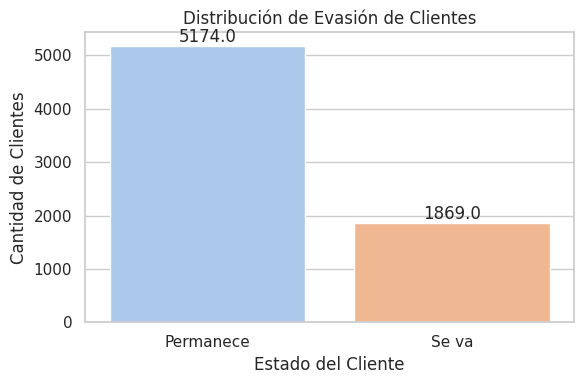

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo visual
sns.set(style="whitegrid")

# Gráfico de barras
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df_final, x='Se_Fue', palette='pastel')

# Etiquetas
ax.set_xticklabels(['Permanece', 'Se va'])
ax.set_title('Distribución de Evasión de Clientes')
ax.set_xlabel('Estado del Cliente')
ax.set_ylabel('Cantidad de Clientes')

# Mostrar valores encima de las barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


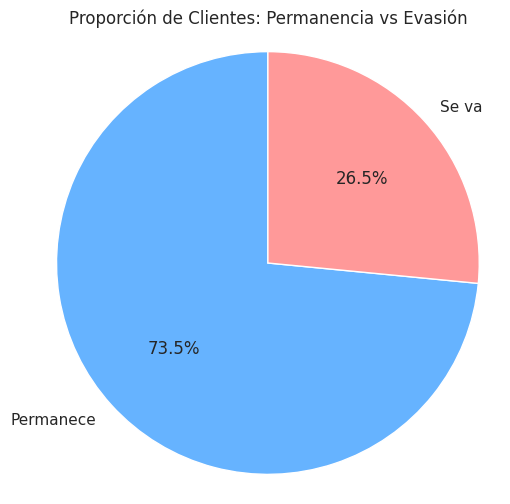

In [28]:
# Recuento
churn_counts = df_final['Se_Fue'].value_counts()

# Etiquetas y proporciones
labels = ['Permanece', 'Se va']
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Proporción de Clientes: Permanencia vs Evasión')
plt.axis('equal')
plt.show()


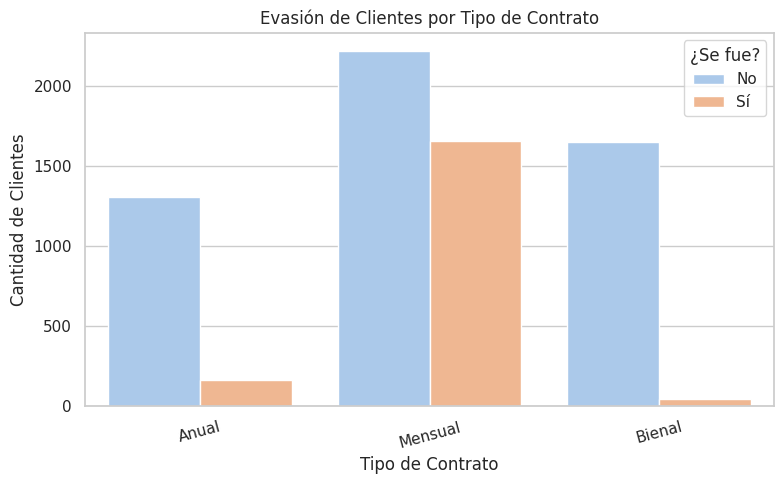

In [29]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_final, x='Contract', hue='Se_Fue', palette='pastel')
plt.title('Evasión de Clientes por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='¿Se fue?', labels=['No', 'Sí'])
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


/tmp/ipython-input-2193665204.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_final, x='Se_Fue', y='Meses_Cliente', palette='pastel')


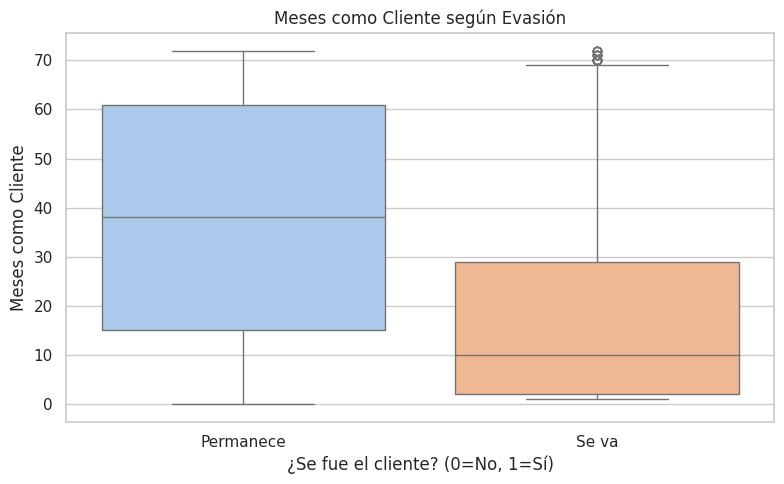

In [30]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_final, x='Se_Fue', y='Meses_Cliente', palette='pastel')
plt.title('Meses como Cliente según Evasión')
plt.xlabel('¿Se fue el cliente? (0=No, 1=Sí)')
plt.ylabel('Meses como Cliente')
plt.xticks([0, 1], ['Permanece', 'Se va'])
plt.tight_layout()
plt.show()


/tmp/ipython-input-3037253008.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_final, x='Se_Fue', y=col, palette='pastel')


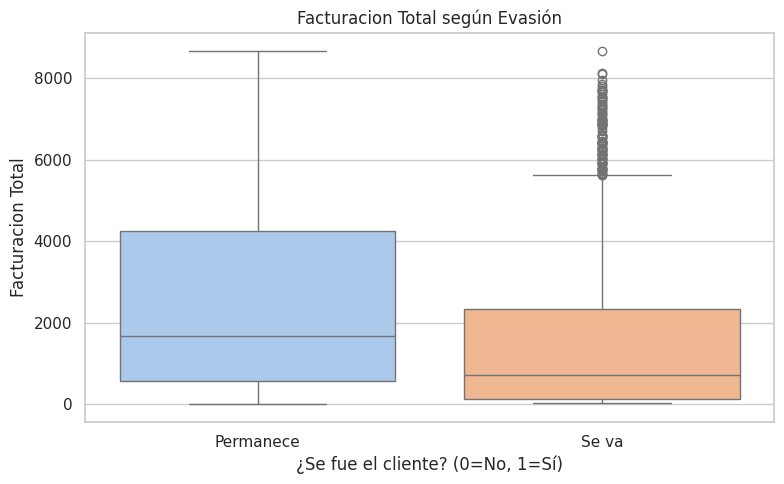

/tmp/ipython-input-3037253008.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_final, x='Se_Fue', y=col, palette='pastel')


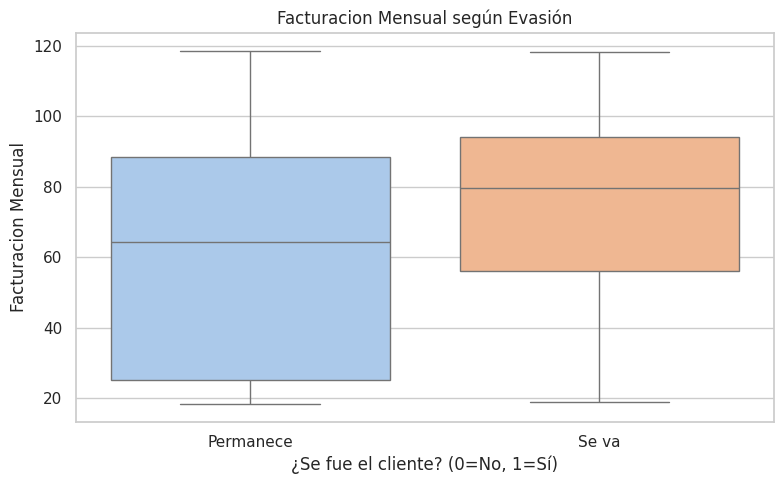

/tmp/ipython-input-3037253008.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_final, x='Se_Fue', y=col, palette='pastel')


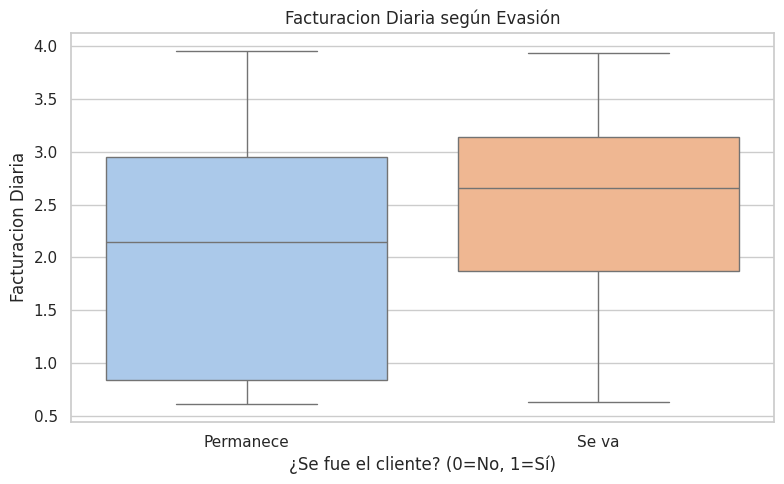

In [31]:
for col in ['Facturacion_Total', 'Facturacion_Mensual', 'Facturacion_Diaria']:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_final, x='Se_Fue', y=col, palette='pastel')
    plt.title(f'{col.replace("_", " ")} según Evasión')
    plt.xlabel('¿Se fue el cliente? (0=No, 1=Sí)')
    plt.ylabel(col.replace("_", " "))
    plt.xticks([0, 1], ['Permanece', 'Se va'])
    plt.tight_layout()
    plt.show()


Informe Final - Análisis de Evasión de Clientes (Churn) - Telecom X
🔹Introducción
La empresa Telecom X se enfrenta a un elevado índice de evasión de clientes (churn), lo que impacta directamente en sus ingresos y sostenibilidad. El objetivo de este análisis es identificar patrones asociados a la cancelación del servicio por parte de los clientes, a partir de datos históricos, con el fin de proporcionar información útil para la toma de decisiones estratégicas orientadas a la retención.

🔹Limpieza y Tratamiento de Datos
El dataset original fue obtenido desde una API en formato JSON y contenía información anidada sobre:

- Datos del cliente (gender, SeniorCitizen, etc.)
- Servicios contratados (InternetService, PhoneService, etc.)
- Información de facturación (MonthlyCharges, TotalCharges)

🔹 Transformaciones realizadas:
- Expansión de columnas anidadas y conversión a DataFrame plano.
- Limpieza de registros vacíos y normalización de valores inconsistentes (No internet service → No).
- Conversión de campos categóricos a binarios (Yes → 1, No → 0).
- Creación de nueva variable: Cuentas_Diarias = MonthlyCharges / 30
- Traducción de campos y valores para facilitar su comprensión.

🔹Resultado: un dataset limpio, sin valores nulos ni duplicados, con 7043 registros y 22 columnas.

🔹Análisis Exploratorio de Datos (EDA)
- Distribución general de evasión 26.5% de los clientes han abandonado el servicio. Visualización de barras y torta muestran una evasión significativa.

- Evasión por contrato: Los contratos mensuales concentran la mayoría de las cancelaciones. Contratos anuales y bienales presentan tasas muy bajas de churn.

- Variables numéricas: Clientes que abandonan:
 - Tienen una permanencia promedio de ~18 meses vs 38 meses en los que se quedan.
 - Poseen mayor facturación mensual y diaria, lo que podría reflejar una percepción de alto costo.
 - Tienen una facturación total más baja, indicando que se van antes de generar ingresos significativos.

🔹 Visualizaciones clave:
 - Boxplots: Meses_Cliente, Facturacion_Mensual
 - Gráficos de barras: Contract, PaymentMethod, InternetService vs Se_Fue
 - Torta de distribución de churn

🔹Conclusiones e Insights
El 26.5% de los clientes abandonan, un indicador crítico que necesita ser atendido con urgencia.
Clientes nuevos (menores a 1 año) son los que más abandonan.
Los clientes con tickets mensuales altos abandonan más, lo que indica una oportunidad de mejorar el valor percibido del servicio.
Los contratos mensuales presentan una clara correlación con la evasión.

🔹Recomendaciones Estratégicas
 - Rediseñar contratos mensuales:
   - Ofrecer beneficios al migrar a contratos anuales/bienales.
   - Implementar promociones con permanencia mínima.
   - Segmentar e intervenir clientes de alto ticket: Detectar los que pagan más y ofrecer atención diferenciada. Aumentar el valor percibido con beneficios exclusivos.
   - Fortalecer onboarding para clientes nuevos: Los primeros 6 meses son críticos. Enviar encuestas, seguimiento personalizado y contacto preventivo.
